## Importing needed libraries and loading the needed data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis and Data Exploration

In [3]:
df['species'].unique() #3 types of species within a iris flower

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df['species'] = df['species'].apply(lambda x: x[5:]) #chopping off iris- in the species column

In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df_s = df[df['species']=='setosa']
df_ve = df[df['species']=='versicolor']
df_vi = df[df['species']=='virginica']

In [7]:
df.isna().sum().sum(),df.duplicated().sum().sum() # seems we have no null values but we have 3 duplicates

(0, 3)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df_s.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [10]:
df_ve.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [11]:
df_vi.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [12]:
df_s['sepal_length'].mean(),df_ve['sepal_length'].mean(),df_vi['sepal_length'].mean()

(5.006, 5.936, 6.587999999999998)

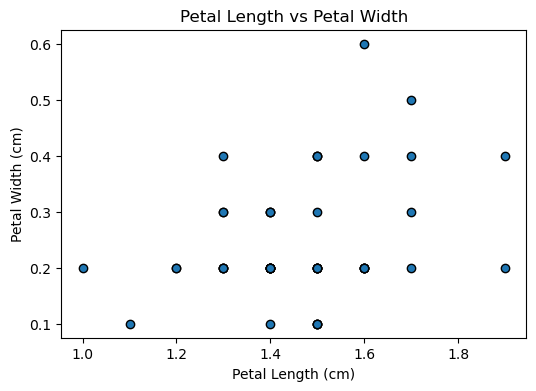

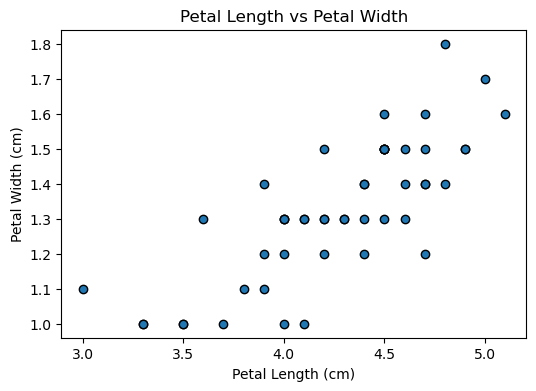

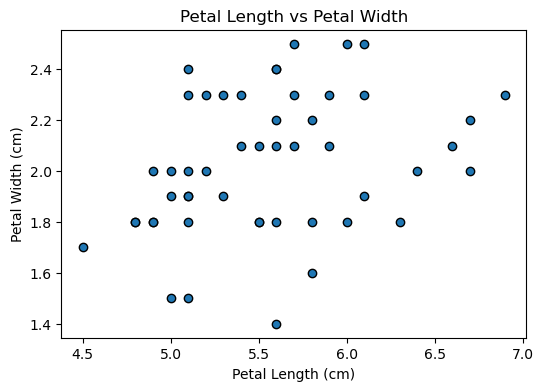

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(df_s['petal_length'], df_s['petal_width'],  edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')


plt.figure(figsize=(6, 4))
plt.scatter(df_ve['petal_length'], df_ve['petal_width'],  edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.figure(figsize=(6, 4))
plt.scatter(df_vi['petal_length'], df_vi['petal_width'],  edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.show()

## we can see that there is a positive correlation between petal length and petal width for each type of specie


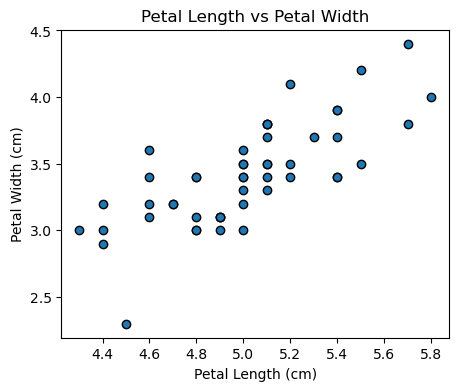

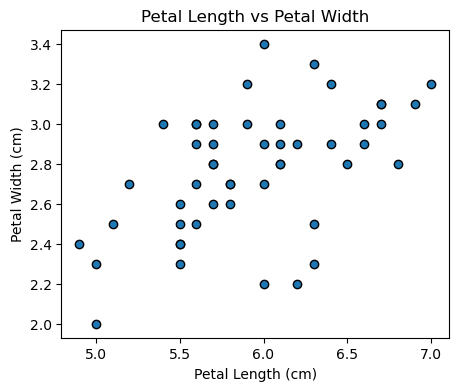

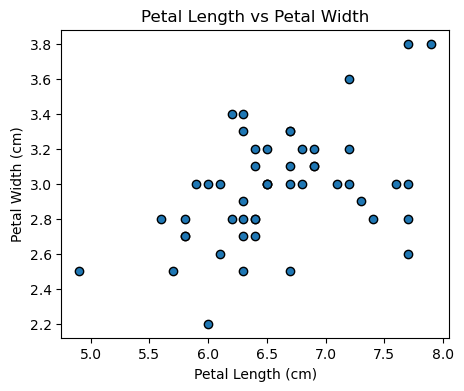

In [14]:
plt.figure(figsize=(5, 4))
plt.scatter(df_s['sepal_length'], df_s['sepal_width'],  edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.figure(figsize=(5, 4))
plt.scatter(df_ve['sepal_length'], df_ve['sepal_width'],  edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.figure(figsize=(5, 4))
plt.scatter(df_vi['sepal_length'], df_vi['sepal_width'],  edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.show()

plt.show()

## we can see that there is a positive correlation between sepal length and sepal width for each type of specie

# Now into the Machine learning model
## We have a categorical column with non-numerical values so we turn them into numerical ones

In [15]:
df['species'] = df['species'].apply(lambda x: 0 if x=='setosa'  else(1 if x=='versicolor' else 2)) 
#changing the categorical values into numerical values


In [16]:
df['sepal_area'] = df.sepal_length * df.sepal_width
df['petal_area'] = df.petal_length * df.petal_width
##adding features (feature engineering)
d = df['species']
df.drop(columns='species',inplace=True)
df['species'] = d

In [17]:
df.species.nunique()

3

In [18]:
XX = df.iloc[:,:4]
yy = df.iloc[:,6]
#not using the features that we generated

In [19]:
X = df.iloc[:,:6]
y = df.iloc[:,6]
#using the features we generated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)  # OvO strategy
model.fit(X_train, y_train)

    # Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [20]:
xx=[]

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2)
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)  # OvO strategy
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    xx.append(accuracy)


In [21]:
x=[]

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)  # OvO strategy
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    x.append(accuracy)

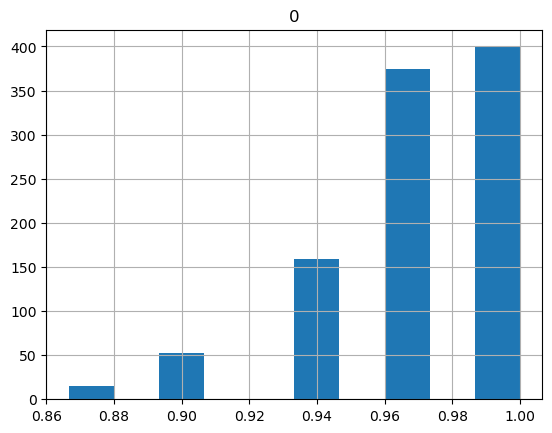

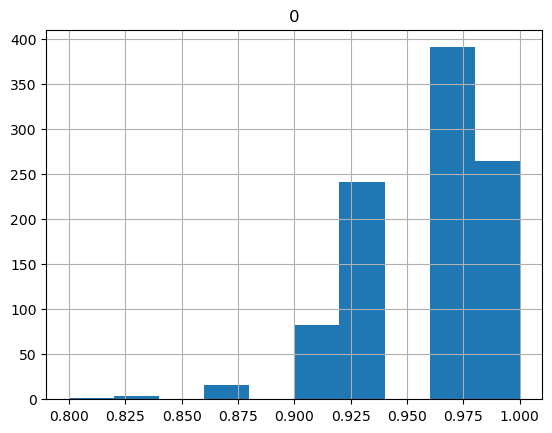

In [22]:
pd.DataFrame(x).hist();
pd.DataFrame(xx).hist();

### we can see that the x which is using the features generated has more values when accuracy = 1 aka 100% correct than the xx which didn't utilize the 2 features we generated so it's probably worth the work